# Lab 3

## Students: Tales Marra and  Gonzalo Quintana

## Part 1:

In [40]:
# Import
%pylab notebook 
import scipy.stats as st
Q = st.norm.sf     # quantile function of the normal distribution
Qchi2 = st.chi2.sf # quantile function of the centred chi2 distribution

Populating the interactive namespace from numpy and matplotlib


In [41]:
import math
sigma_W = 1
NbTests = 1000
rho_db = np.arange(-10,51)
rho_l = 10 ** (rho_db/10)
r=[]
r_t=[]
for rho in rho_l:
    lambda_sq = math.log(rho+1)*(sigma_W**2)*(rho+1)/rho
    eps_realizations = []
    predictions = []
    for nb_test in range(NbTests):
        epsilon = st.bernoulli.rvs(p = 0.5) # Generate Epsilon Vector
        eps_realizations.append(epsilon)
        n = 10
        sigma_S = math.sqrt(rho * sigma_W**2)
        W = numpy.random.normal(0,sigma_W,n)
        S = numpy.random.normal(0,sigma_S,n)
        X = [epsilon*(S+W)+ (1-epsilon)*W]
        squared_norm = numpy.linalg.norm(X,2)**2
        if squared_norm>lambda_sq:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions  = np.array(predictions)
    eps_realizations = np.array(eps_realizations)
    result = (abs(predictions-eps_realizations))
    Pe = np.mean(result)
    r.append(Pe)
    Pe_t = 1/2 + Qchi2((rho + 1)/rho*np.log(rho + 1),n) - Qchi2(np.log(rho + 1)/rho,n) 
    r_t.append(Pe_t)

     

<IPython.core.display.Javascript object>


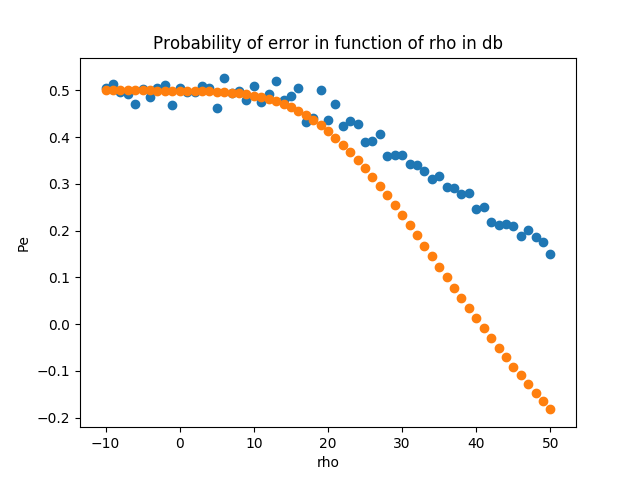

In [42]:
import matplotlib.pyplot as plt
plt.title('Probability of error in function of rho in db')
plt.xlabel('rho')
plt.ylabel('Pe')
plt.scatter(rho_db,r)
plt.scatter(rho_db,r_t)
plt.show()

## Part 2:

### Monte-Carlo simulations for Newman-Pearson

In [112]:
sigma_W = 1
NbTests = 100000
A=10
alpha = 0.5
sigma = 1
lambd_plus = sigma*Q(alpha)**(-1)
eps_realizations = []
predictions = []
for nb_test in range(NbTests):
    n = 10
    epsilon = st.bernoulli.rvs(p = 0.5) # Generate Epsilon Vector
    eps_realizations.append(epsilon)
    if epsilon==1:
        X = np.random.normal(0,1,n)
    else:
        Aeps_zero = [A/n for i in range(0,10)]
        Aeps_zero = np.array(Aeps_zero)
        X = sigma*randn(n)+Aeps_zero
    if np.dot(X,eps_zero)>lambd_plus:
         predictions.append(0)
    else:
        predictions.append(1)
predictions  = np.array(predictions)
eps_realizations = np.array(eps_realizations)
result = (abs(predictions-eps_realizations))
pe = np.mean(result)

In [113]:
print('Probability of error',pe)

Probability of error 0.0853


### Monte-Carlo Simulations for GLRT Test:

In [118]:
sigma_W = 1
NbTests = 100000
A=10
alpha = 0.5
sigma = 1
lambd_plus = sigma*Q(alpha/2)**(-1)
eps_realizations = []
predictions = []
for nb_test in range(NbTests):
    n = 10
    epsilon = st.bernoulli.rvs(p = 0.5) # Generate Epsilon Vector
    eps_realizations.append(epsilon)
    if epsilon==1:
        X = np.random.normal(0,1,n)
    else:
        Aeps_zero = [A/n for i in range(0,10)]
        Aeps_zero = np.array(Aeps_zero)
        X = sigma*randn(n)+Aeps_zero
    if np.dot(X,eps_zero)>lambd_plus:
         predictions.append(0)
    else:
        predictions.append(1)
predictions  = np.array(predictions)
eps_realizations = np.array(eps_realizations)
result = (abs(predictions-eps_realizations))
pe = np.mean(result)

In [119]:
print('Probability of error',pe)

Probability of error 0.1107


Our simulations as well as our theoretical results show that this method presents close results to the NP test.